In [40]:
# draw figure 5, the contour plot

import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys
sns.set()
mpl.rc('image', cmap='viridis')
plt.rcParams['axes.grid'] = False

In [21]:
def fold_change(lkns, el, gama,c=1000, K=1):
    
    pref= 1/lkns -1
    numeratorfc = 1+np.exp(-el-gama)*((c/K)**2)
    denomenatorfc = 1+np.exp(-el)*((c/K)**2)
    
    FC = 1/(1+pref*numeratorfc/denomenatorfc)
    return FC

In [2]:
Post_mutname_full=[ 'Y132A', 'C203V', 'D53H', 'P176N_I174K_F177S',
               'R49G',  'P105M', 'G143M','E150Y', 'Q32A_E147G',      
               'G102D_K98Q', 'G102D_L146A', 'G102D_T26A', 'G102D_H44F_Q47S_Q76K', 'G102D_Y42M_I57N', 
              
               'Y132A_G102D_T26A', 'Y132A_PIF', 'Y132A_R49G', 'Y132A_C203V',
               'C203V_D53H',       'C203V_R49G','C203V_PIF',  'C203V_G102D_L146A', 'WT']
print(len(Post_mutname_full))

23


In [3]:
Post_mutname=[ 'Y', 'C', 'D', 'PIF',
               'R',  'P', 'G','E', 'QE',      
               'GK', 'GL', 'GT', 'GHQQ', 'GYI', 
              
               'YGT', 'YPIF', 'YR', 'YC',
               'CD',       'CR','CPIF',  'CGL', 'WT']
print(len(Post_mutname))

23


In [14]:
with open('Inferred_Post_Samples.txt','r') as f:
    alllines=f.readlines()
Post_Samples=[]
for each in alllines[2::2]:
    Temp=[]
    for eac in each[2:-3].split('], ['):
        temp=[]
        for ea in eac.split(','):
            temp.append(float(ea))
        Temp.append(temp)
    Post_Samples.append(Temp[1:1001])
print(np.shape(Post_Samples))

(23, 1000, 3)


In [18]:
with open('leak_info.txt','r') as g:
    alllines=g.readlines()[0][2:-2]
    
temp_leakraw, Leakns_read =alllines.split('], ['), []
for each in temp_leakraw:
    tplkr, templ =each.split(','), []
    for eac in tplkr: templ.append(float(eac))
    Leakns_read.append(templ)
print(np.shape(Leakns_read))

(23, 2)


In [23]:
paras_contp=[]
for i in range(23):
    temp=[Leakns_read[i][0], np.median(np.asarray(Post_Samples[i])[:,0]), np.median(np.asarray(Post_Samples[i])[:,1])]
    paras_contp.append(temp)
    
print(np.shape(paras_contp))
# print(paras_contp[-1])

(23, 3)


In [26]:
minx, maxx =0, 14.1    # x is el
miny, maxy =-4, 10.1   # y is gamma
# ax=None
grid_width = max(maxx-minx, maxy-miny) / 200.0
xx, yy = np.mgrid[minx : maxx : grid_width, miny : maxy : grid_width]

V = fold_change(0.0086, xx, yy)
norm = mpl.colors.Normalize(vmin=0,vmax=1)

In [27]:
fcs=[]
for each in paras_contp: fcs.append(fold_change(each[0],each[1], each[2]))
print(len(fcs))

23


In [36]:
x = np.asarray(paras_contp)[:,1]
y = np.asarray(paras_contp)[:,2]
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(r_value,p_value)

-0.6471824568266743 0.0008441094085960871


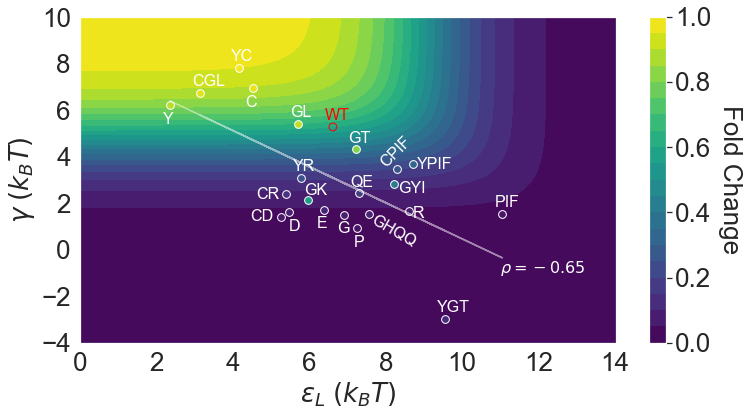

In [44]:
cont_plot = plt.figure(figsize=(12,6))  # Contour plot
contp = cont_plot.add_subplot(111)
a=contp.contourf(xx, yy, V.clip(max=2000),levels=20,norm=norm)
cbar = contp.figure.colorbar(a,ticks=np.arange(0, 1.01, 0.2))
ftsz=26
cbar.ax.tick_params(labelsize=ftsz)
cbar.set_label('Fold Change', rotation=-90,fontsize=ftsz, labelpad=30)
contp.set_xlabel('$\epsilon_L$ $(k_BT)$',size=ftsz)
contp.set_ylabel('$\gamma$ $(k_BT)$',size=ftsz)
contp.tick_params(labelsize=ftsz)
contp.set_xticks(np.arange(0,14.1,2))
contp.set_yticks(np.arange(-4,10.1,2))
cmap=plt.get_cmap('viridis')
contp.plot(x, intercept + slope*x, 'w',alpha=0.5)

ssize=60
cnt=-1
for each in paras_contp:
    cnt+=1
    if cnt==22:
        contp.scatter(each[1],each[2],edgecolor='red',facecolors='None',linewidth=1., s=ssize)
        contp.text(each[1]-0.2,each[2]+0.3,Post_mutname[cnt],c='red',fontsize=16)
    elif Post_mutname[cnt] in ['YC','YR','YGT','GT','QE','CGL','PIF','GL']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]-0.2,each[2]+0.3,Post_mutname[cnt],c='white',fontsize=16)
    elif Post_mutname[cnt] in ['GK']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]-0.1,each[2]+0.2,Post_mutname[cnt],c='white',fontsize=16)
    elif Post_mutname[cnt] in ['YPIF']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]+0.1,each[2]-0.2,Post_mutname[cnt],c='white',fontsize=16)
    elif Post_mutname[cnt] in ['CPIF']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]-0.5,each[2]+0.05,Post_mutname[cnt],c='white',fontsize=16,rotation='45')
    elif Post_mutname[cnt] in ['GYI']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]+0.1,each[2]-0.4,Post_mutname[cnt],c='white',fontsize=16)
    elif Post_mutname[cnt] in ['GHQQ']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]-0.,each[2]-1.4,Post_mutname[cnt],c='white',fontsize=16,rotation='-30')
    elif Post_mutname[cnt] in ['R']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]+0.1,each[2]-0.3,Post_mutname[cnt],c='white',fontsize=16)
    elif Post_mutname[cnt] in ['CR','CD']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]-0.8,each[2]-0.2,Post_mutname[cnt],c='white',fontsize=16)
    elif Post_mutname[cnt] in ['D']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]+0.0,each[2]-0.8,Post_mutname[cnt],c='white',fontsize=16)
    elif Post_mutname[cnt] in ['P']:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]-0.1,each[2]-0.8,Post_mutname[cnt],c='white',fontsize=16)
            
    else:
        contp.scatter(each[1],each[2],color=cmap(fcs[cnt]), edgecolor='white',s=ssize,cmap='viridis',norm=norm)
        contp.text(each[1]-0.2,each[2]-0.8,Post_mutname[cnt],c='white',fontsize=16)

contp.text(11,-1,r'$\rho=-0.65$',c='white',fontsize=16)
# cont_plot.savefig('New_Figures/Figure5_linreg.pdf',dpi=300,bbox_inches='tight',pad_inches=0.01)
cont_plot.savefig('New_Figures/Figure5_linreg.png',dpi=300,bbox_inches='tight',pad_inches=0.01)